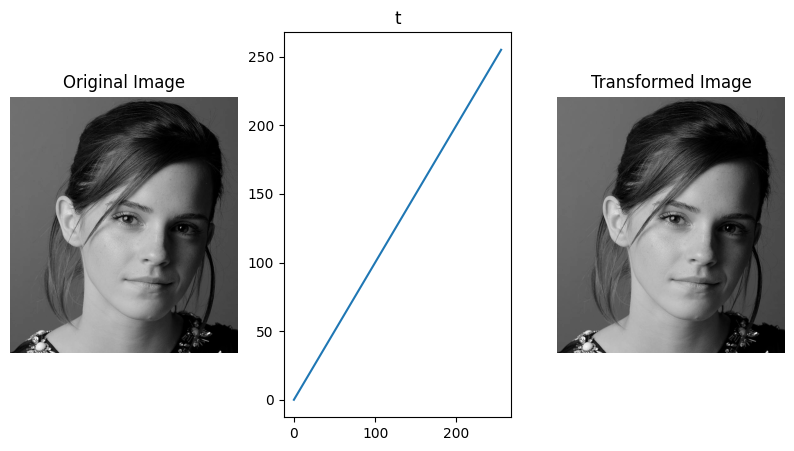

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f= cv.imread('Images-20240703/emma.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None
t = np.arange(256, dtype=np.uint8)
#g = t[f]
g = cv.LUT(f, t)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(f, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].plot(t)
ax[1].set_title('t')
ax[2].imshow(g, cmap='gray')
ax[2].set_title('Transformed Image')   
ax[2].axis('off')
plt.show()


In [3]:
t.dtype

dtype('uint8')

In [3]:
# Negative Transformation

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f= cv.imread('Images-20240703/tom.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None
t = np.arange(255, -1, -1, dtype=np.uint8)
#g = t[f]
g = cv.LUT(f, t)

cv.namedWindow('Original Image', cv.WINDOW_NORMAL)
cv.imshow('Original Image', f)
cv.waitKey(0)
cv.imshow('Transformed Image', g)
cv.waitKey(0)  
cv.destroyAllWindows()

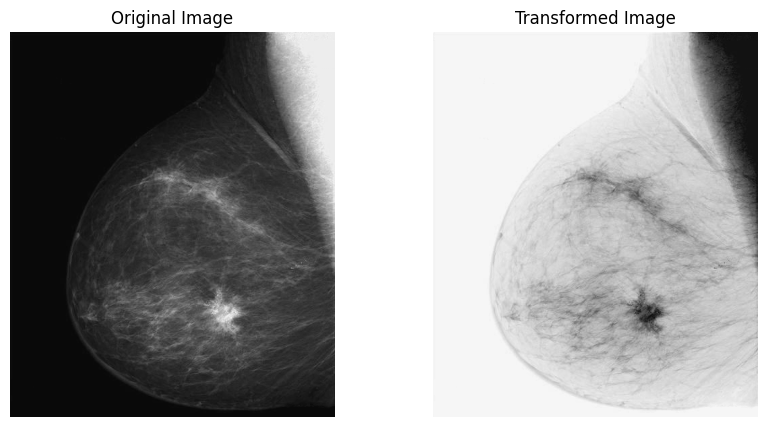

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f= cv.imread('Images-20240703/Fig0304(a)(breast_digital_Xray).tif', cv.IMREAD_GRAYSCALE)
assert f is not None
t = np.arange(255, -1, -1, dtype=np.uint8)
#g = t[f]
g = cv.LUT(f, t)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(f, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
# ax[1].plot(t)
# ax[1].set_title('t')
ax[1].imshow(g, cmap='gray')
ax[1].set_title('Transformed Image')   
ax[1].axis('off')
plt.show()


101
50
105
256


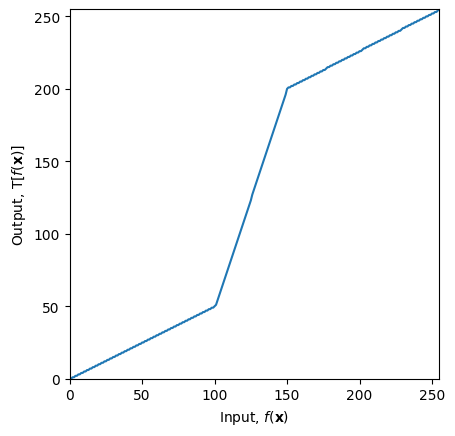

In [4]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
print(len(t3)) 
 
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()


img_orig = cv.imread('Images-20240703/hugh.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()


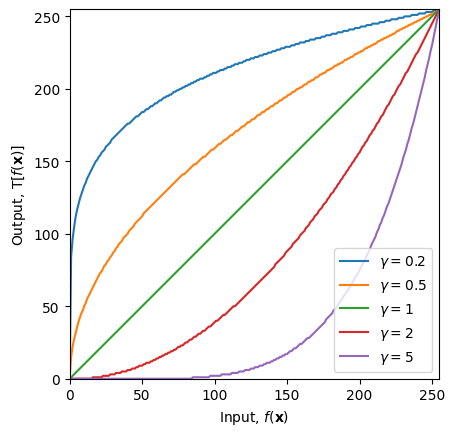

In [6]:
# Plots of Functions for Gamma Correction
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
gamma = [0.2, 0.5, 1, 2, 5]
for g in gamma:
    table = np.array([(i/255.0)**(g)*255.0 for i in np.arange(0,256)]).astype('uint8')
    ax.plot(table, label=r'$\gamma = {g}$'.format(g=g))
ax.legend(loc='best')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
plt.savefig('transform.png')
plt.show()
    

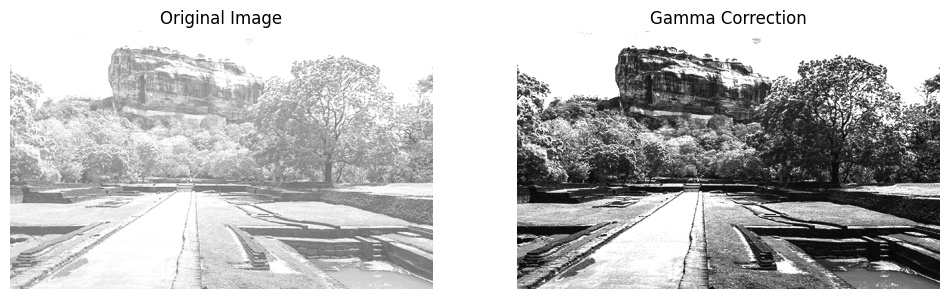

In [10]:
# Gamma Correction
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gamma = 4
f = cv.imread('Images-20240703/sigiriya.jpg', cv.IMREAD_GRAYSCALE)
im = cv.add(f,100)

t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype(np.uint8)
g = cv.LUT(im, t)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Gamma Correction')
for a in ax:
    a.axis('off')
plt.show()

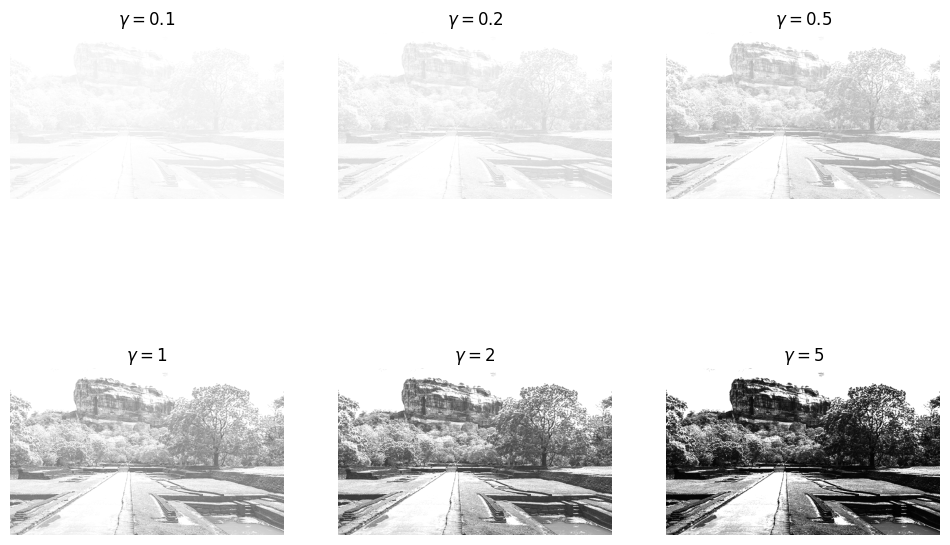

In [12]:
# Do teh above for gramma = 0.1, 0.2, 0.5, 1, 2, 5

# import cv2 as cv
# import numpy as np
# import matplotlib.pyplot as plt

gammas = [0.1, 0.2, 0.5, 1, 2, 5]
# f = cv.imread('images/Fig0309(a)(washed_out_aerial_image).tif', cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, gamma in enumerate(gammas):
    t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype(np.uint8)
    g = cv.LUT(im, t)
    ax[i//3, i%3].imshow(g, cmap='gray', vmin=0, vmax=255)
    ax[i//3, i%3].set_title(r'$\gamma = {gamma}$'.format(gamma=gamma))
    ax[i//3, i%3].axis('off')
plt.show()


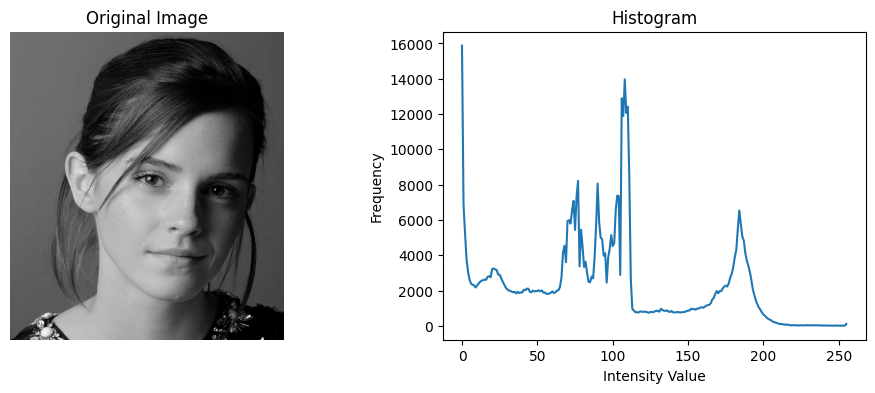

In [16]:
# Histrogram Using Numpy
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('Images-20240703/emma.jpg', cv.IMREAD_GRAYSCALE)
hist, bins = np.histogram(f.ravel(), 256, [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].plot(hist)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

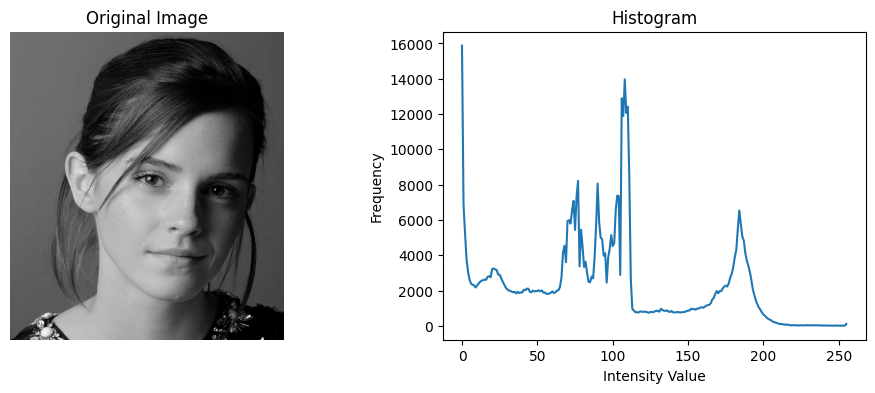

In [17]:
# Histogram Using OpenCV
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('Images-20240703/emma.jpg', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([f], [0], None, [256], [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].plot(hist)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

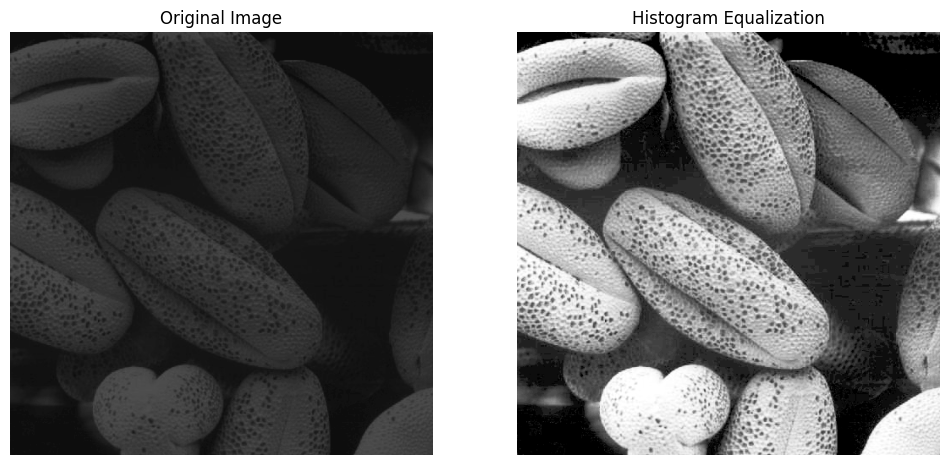

In [18]:
# Carry Our Histogram Equalization on the shells.tif Image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('Images-20240703/shells.tif', cv.IMREAD_GRAYSCALE)
g = cv.equalizeHist(f)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')
plt.show()

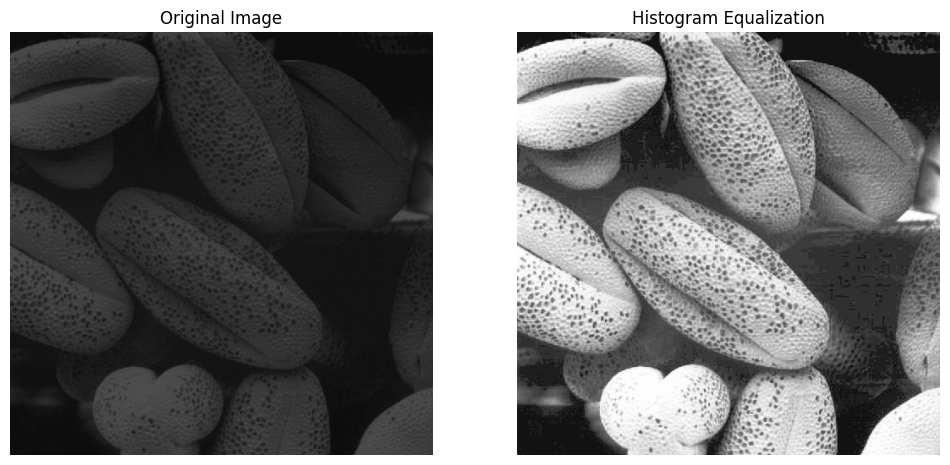

In [20]:
# Do the Same Using a Hand-Computed Intensity Transfromation
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('Images-20240703/shells.tif', cv.IMREAD_GRAYSCALE)
M, N = f.shape
L = 256
t = np.zeros(256, dtype=np.uint8)
hist, bins = np.histogram(f.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_min = cdf.min()
cdf_max = cdf.max()
t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)
g = t[f]
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')
plt.show()